# 线性混合模型

#### 黄荣贵（复旦大学社会学系）

## 数据预处理

In [1]:
library(nlme)

head(MathAchieve)

,School,Minority,Sex,SES,MathAch,MEANSES
,<ord>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,1224,No,Female,-1.528,5.876,-0.428
2,1224,No,Female,-0.588,19.708,-0.428
3,1224,No,Male,-0.528,20.349,-0.428
4,1224,No,Male,-0.668,8.781,-0.428
5,1224,No,Male,-0.158,17.898,-0.428
6,1224,No,Male,0.022,4.583,-0.428


In [2]:
head(MathAchSchool)

,School,Size,Sector,PRACAD,DISCLIM,HIMINTY,MEANSES
,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>
1224,1224,842,Public,0.35,1.597,0,-0.428
1288,1288,1855,Public,0.27,0.174,0,0.128
1296,1296,1719,Public,0.32,-0.137,1,-0.420
1308,1308,716,Catholic,0.96,-0.622,0,0.534
1317,1317,455,Catholic,0.95,-1.694,1,0.351
1358,1358,1430,Public,0.25,1.535,0,-0.014


为了示范汇总计算，先删除MEANSES变量。

In [3]:
MathAchieve$MEANSES <- MathAchSchool$MEANSES <- NULL

In [4]:
math <- merge(x = MathAchieve, y = MathAchSchool, by = "School", all.x = TRUE, all.y = FALSE)

In [5]:
dim(MathAchieve)

dim(math)

[1] 7185    5

[1] 7185   10

In [6]:
names(math) <- tolower(names(math))

head(math)

,school,minority,sex,ses,mathach,size,sector,pracad,disclim,himinty
,<ord>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>
1,1224,No,Female,-1.528,5.876,842,Public,0.35,1.597,0
2,1224,No,Female,-0.588,19.708,842,Public,0.35,1.597,0
3,1224,No,Male,-0.528,20.349,842,Public,0.35,1.597,0
4,1224,No,Male,-0.668,8.781,842,Public,0.35,1.597,0
5,1224,No,Male,-0.158,17.898,842,Public,0.35,1.597,0
6,1224,No,Male,0.022,4.583,842,Public,0.35,1.597,0


计算学校的平均值/中位值

In [7]:
math$meanses <- with(math, ave(ses, by=school, FUN = mean))
math$medianses <- with(math,ave(ses, by=school, FUN = median))

In [8]:
head(math)

,school,minority,sex,ses,mathach,size,sector,pracad,disclim,himinty,meanses,medianses
,<ord>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
1,1224,No,Female,-1.528,5.876,842,Public,0.35,1.597,0,-0.434383,-0.468
2,1224,No,Female,-0.588,19.708,842,Public,0.35,1.597,0,-0.434383,-0.468
3,1224,No,Male,-0.528,20.349,842,Public,0.35,1.597,0,-0.434383,-0.468
4,1224,No,Male,-0.668,8.781,842,Public,0.35,1.597,0,-0.434383,-0.468
5,1224,No,Male,-0.158,17.898,842,Public,0.35,1.597,0,-0.434383,-0.468
6,1224,No,Male,0.022,4.583,842,Public,0.35,1.597,0,-0.434383,-0.468


## 使用nlme程序包估计线性混合模型

### 分组ols分析及其可视化

In [9]:
mod_ols = lmList(mathach ~ ses|school, data=math)

In [10]:
# summary(mod_ols)

In [11]:
# coef(mod_ols)

In [12]:
head(coef(mod_ols))

,(Intercept),ses
,<dbl>,<dbl>
8367,4.546383,0.2503748
8854,5.707002,1.9388446
4458,6.999212,1.1318372
5762,3.114085,-1.0140992
6990,6.440875,0.9476903
5815,9.323601,3.0180018


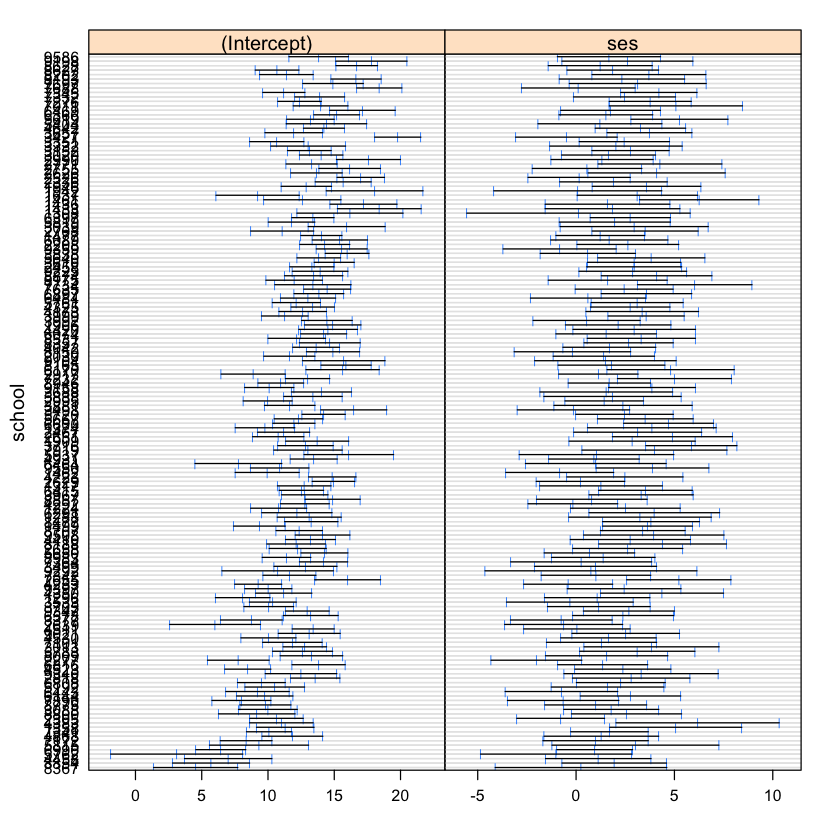

In [13]:
plot(intervals(mod_ols))

### 估计随机截距模型

In [14]:
mod = lme(fixed=mathach ~ 1, data=math, random = ~1|school)

summary(mod)

Linear mixed-effects model fit by REML
 Data: math 
       AIC      BIC   logLik
  47122.79 47143.43 -23558.4

Random effects:
 Formula: ~1 | school
        (Intercept) Residual
StdDev:    2.934966 6.256862

Fixed effects: mathach ~ 1 
               Value Std.Error   DF  t-value p-value
(Intercept) 12.63697 0.2443936 7025 51.70747       0

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-3.06312473 -0.75387398  0.02670132  0.76062171  2.74262579 

Number of Observations: 7185
Number of Groups: 160 

随机效应的方差/协方差

In [15]:
VarCorr(mod)

school = pdLogChol(1) 
            Variance  StdDev  
(Intercept)  8.614025 2.934966
Residual    39.148322 6.256862

In [16]:
ols = lm(mathach ~ 1, data=math)

比较多层次模型与线性回归模型

In [17]:
anova(mod, ols)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
mod,"lme.formula(fixed = mathach ~ 1, data = math, random = ~1 | school)",1,3,47122.79,47143.43,-23558.40,,NA,NA
ols,"lm(formula = mathach ~ 1, data = math)",2,2,48106.92,48120.68,-24051.46,1 vs 2,986.1238,1.864135e-216


获取随机效应（比如，在HAPC分析中需要计算随机效应）

In [18]:
#ranef(mod)

In [19]:
head(ranef(mod))

,(Intercept)
,<dbl>
8367,-6.103012
8854,-7.352914
4458,-6.235217
5762,-7.402819
6990,-6.134179
5815,-4.540248


In [20]:
summary(lme(fixed=mathach ~ ses, data=math, random = ~1|school))

Linear mixed-effects model fit by REML
 Data: math 
       AIC      BIC    logLik
  46653.17 46680.69 -23322.58

Random effects:
 Formula: ~1 | school
        (Intercept) Residual
StdDev:    2.183615 6.085589

Fixed effects: mathach ~ ses 
                Value Std.Error   DF  t-value p-value
(Intercept) 12.657480 0.1879851 7024 67.33234       0
ses          2.390196 0.1057191 7024 22.60893       0
 Correlation: 
    (Intr)
ses 0.003 

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-3.12607345 -0.72720308  0.02188316  0.75771694  2.91911572 

Number of Observations: 7185
Number of Groups: 160 

In [21]:
summary(lme(fixed=mathach ~ ses + sector, data=math, random = ~1|school))

Linear mixed-effects model fit by REML
 Data: math 
       AIC      BIC    logLik
  46621.15 46655.55 -23305.58

Random effects:
 Formula: ~1 | school
        (Intercept) Residual
StdDev:    1.919646 6.085796

Fixed effects: mathach ~ ses + sector 
                   Value Std.Error   DF  t-value p-value
(Intercept)    11.718908 0.2280585 7024 51.38554       0
ses             2.374711 0.1054911 7024 22.51102       0
sectorCatholic  2.100837 0.3411243  158  6.15857       0
 Correlation: 
               (Intr) ses   
ses             0.063       
sectorCatholic -0.672 -0.091

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-3.14856704 -0.73100350  0.01928779  0.75365720  2.92634478 

Number of Observations: 7185
Number of Groups: 160 

In [22]:
summary(lme(fixed=mathach ~ ses*sector, data=math, random = ~1|school))

Linear mixed-effects model fit by REML
 Data: math 
       AIC      BIC    logLik
  46586.16 46627.44 -23287.08

Random effects:
 Formula: ~1 | school
        (Intercept) Residual
StdDev:    1.922046 6.069612

Fixed effects: mathach ~ ses * sector 
                       Value Std.Error   DF  t-value p-value
(Intercept)        11.797994 0.2285159 7023 51.62878       0
ses                 2.951174 0.1406087 7023 20.98856       0
sectorCatholic      2.138170 0.3413462  158  6.26394       0
ses:sectorCatholic -1.312849 0.2119960 7023 -6.19280       0
 Correlation: 
                   (Intr) ses    sctrCt
ses                 0.084              
sectorCatholic     -0.669 -0.057       
ses:sectorCatholic -0.056 -0.663 -0.017

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-3.07708708 -0.72532361  0.01753465  0.76024893  3.02223604 

Number of Observations: 7185
Number of Groups: 160 

### 估计随机系数模型

In [23]:
summary(lme(fixed=mathach ~ 1 + ses, data=math, random = ~1 + ses|school))

Linear mixed-effects model fit by REML
 Data: math 
      AIC      BIC   logLik
  46652.4 46693.68 -23320.2

Random effects:
 Formula: ~1 + ses | school
 Structure: General positive-definite, Log-Cholesky parametrization
            StdDev    Corr  
(Intercept) 2.1974163 (Intr)
ses         0.6425959 -0.109
Residual    6.0687861       

Fixed effects: mathach ~ 1 + ses 
                Value Std.Error   DF  t-value p-value
(Intercept) 12.665023  0.189845 7024 66.71245       0
ses          2.393813  0.118121 7024 20.26577       0
 Correlation: 
    (Intr)
ses -0.045

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-3.12272307 -0.73045839  0.02144271  0.75610147  2.94356062 

Number of Observations: 7185
Number of Groups: 160 

### 三水平模型

In [24]:
data(Chem97, package="mlmRev")

summary(lme(fixed=score ~ gcsecnt, data=Chem97, random = ~1|lea/school)) # level3/level2

Linear mixed-effects model fit by REML
 Data: Chem97 
     AIC      BIC    logLik
  141707 141748.7 -70848.49

Random effects:
 Formula: ~1 | lea
        (Intercept)
StdDev:   0.1215149

 Formula: ~1 | school %in% lea
        (Intercept) Residual
StdDev:    1.079906 2.270287

Fixed effects: score ~ gcsecnt 
               Value  Std.Error    DF  t-value p-value
(Intercept) 5.635455 0.03123463 28611 180.4233       0
gcsecnt     2.472557 0.01690409 28611 146.2697       0
 Correlation: 
        (Intr)
gcsecnt 0.058 

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-4.18656757 -0.63526995  0.07593226  0.66765880  6.69273101 

Number of Observations: 31022
Number of Groups: 
            lea school %in% lea 
            131            2410 

### 关于nlme程序包的延伸阅读

Pinheiro, J.C., and Bates, D.M. (2000) "Mixed-Effects Models in S and S-PLUS", Springer.

## 使用lme4估计混合效应模型

lme4 is the replacement of nlme

In [25]:
library(lme4)

summary(lmer(mathach ~ 1|school, data=math))

Loading required package: Matrix


Attaching package: ‘lme4’


The following object is masked from ‘package:nlme’:

    lmList




Linear mixed model fit by REML ['lmerMod']
Formula: mathach ~ 1 | school
   Data: math

REML criterion at convergence: 47116.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0631 -0.7539  0.0267  0.7606  2.7426 

Random effects:
 Groups   Name        Variance Std.Dev.
 school   (Intercept)  8.614   2.935   
 Residual             39.148   6.257   
Number of obs: 7185, groups:  school, 160

Fixed effects:
            Estimate Std. Error t value
(Intercept)  12.6370     0.2444   51.71

In [26]:
summary(lmer(mathach ~ ses + (1|school), data=math))

Linear mixed model fit by REML ['lmerMod']
Formula: mathach ~ ses + (1 | school)
   Data: math

REML criterion at convergence: 46645.2

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.12607 -0.72720  0.02188  0.75772  2.91912 

Random effects:
 Groups   Name        Variance Std.Dev.
 school   (Intercept)  4.768   2.184   
 Residual             37.034   6.086   
Number of obs: 7185, groups:  school, 160

Fixed effects:
            Estimate Std. Error t value
(Intercept)  12.6575     0.1880   67.33
ses           2.3902     0.1057   22.61

Correlation of Fixed Effects:
    (Intr)
ses 0.003 

In [27]:
summary(lmer(mathach ~ ses + (1+ses|school), data=math))

Linear mixed model fit by REML ['lmerMod']
Formula: mathach ~ ses + (1 + ses | school)
   Data: math

REML criterion at convergence: 46640.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.12272 -0.73046  0.02144  0.75610  2.94356 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 school   (Intercept)  4.8287  2.1974        
          ses          0.4129  0.6426   -0.11
 Residual             36.8301  6.0688        
Number of obs: 7185, groups:  school, 160

Fixed effects:
            Estimate Std. Error t value
(Intercept)  12.6650     0.1898   66.71
ses           2.3938     0.1181   20.27

Correlation of Fixed Effects:
    (Intr)
ses -0.045

In [28]:
summary(lmer(mathach ~ ses + (1+ses||school), data=math))

Linear mixed model fit by REML ['lmerMod']
Formula: mathach ~ ses + ((1 | school) + (0 + ses | school))
   Data: math

REML criterion at convergence: 46640.7

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.12410 -0.73160  0.02253  0.75467  2.93201 

Random effects:
 Groups   Name        Variance Std.Dev.
 school   (Intercept)  4.853   2.2029  
 school.1 ses          0.424   0.6511  
 Residual             36.822   6.0681  
Number of obs: 7185, groups:  school, 160

Fixed effects:
            Estimate Std. Error t value
(Intercept)  12.6527     0.1903   66.50
ses           2.3955     0.1184   20.23

Correlation of Fixed Effects:
    (Intr)
ses 0.000 

In [29]:
mod = lmer(mathach ~ ses*sector + (1|school), data=math)

拟合优度相关统计量

In [30]:
AIC(mod)

[1] 46586.16

In [31]:
BIC(mod)

[1] 46627.44

In [32]:
logLik(mod)

'log Lik.' -23287.08 (df=6)

计算回归系数的置信区间

In [33]:
confint(mod, "beta_")

Computing profile confidence intervals ...



,2.5 %,97.5 %
(Intercept),11.350179,12.245254
ses,2.675430,3.231152
sectorCatholic,1.470187,2.807550
ses:sectorCatholic,-1.727771,-0.896891


计算随机效应标准差的置信区间

In [34]:
confint(mod, "theta_")

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,1.656091,2.195704
.sigma,5.969806,6.170694


获取随机效应

In [35]:
ranef(mod)

$school
     (Intercept)
8367 -4.27533159
8854 -4.05975514
4458 -2.39242378
5762 -3.11108396
6990 -3.68303184
5815 -1.80130922
7172 -4.39780059
4868 -1.71469282
7341 -1.27105747
1358 -0.40056833
4383 -0.39198191
2305 -1.54027989
8800 -4.14616134
3088 -1.00133634
8775 -1.10003901
7890 -1.60120785
6144 -1.59238667
6443 -0.96118827
5192 -2.52352082
6808 -1.81636521
2818  1.41756516
9340  0.41156444
4523 -4.53429863
6816 -0.22386357
2277 -2.91389770
8009 -0.57433026
5783  0.62632161
3013  0.79396633
7101  0.02306252
4530 -3.36924913
9021 -0.22591789
4511 -0.30001920
2639 -1.88803502
3377 -0.72352467
6578 -0.93020498
9347 -0.63335356
3705 -3.26532068
3533 -2.73800083
1296 -2.40637308
4350 -0.30175076
9397 -1.51657835
4253 -3.33727938
2655  2.19662505
7342 -1.73735068
9292  0.15448472
3499 -1.10636934
7364  0.31172775
8983  0.05127749
5650  0.24606747
2658 -1.03005660
8188  0.39984665
4410  1.11847470
9508 -0.10539041
8707  0.52009068
1499 -2.32512447
8477  1.02637010
1288  0.96786886
6291 -

In [36]:
str(ranef(mod))

List of 1
 $ school:'data.frame':	160 obs. of  1 variable:
  ..$ (Intercept): num [1:160] -4.28 -4.06 -2.39 -3.11 -3.68 ...
  ..- attr(*, "postVar")= num [1, 1, 1:160] 1.537 0.878 0.635 0.784 0.585 ...
 - attr(*, "class")= chr "ranef.mer"


$school


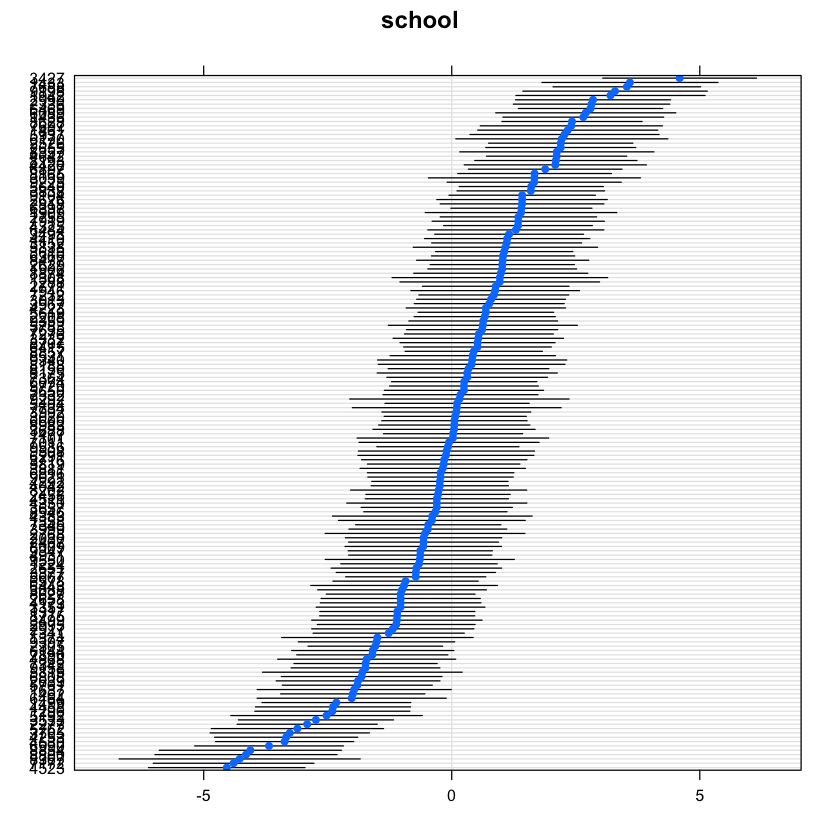

In [37]:
library(lattice)

dotplot(ranef(mod, condVar=TRUE), strip = FALSE)

### 三水平随机截距模型

In [38]:
summary(lmer(score ~ gcsecnt + (1|lea/school), data=Chem97))

Linear mixed model fit by REML ['lmerMod']
Formula: score ~ gcsecnt + (1 | lea/school)
   Data: Chem97

REML criterion at convergence: 141697

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.1866 -0.6353  0.0759  0.6677  6.6927 

Random effects:
 Groups     Name        Variance Std.Dev.
 school:lea (Intercept) 1.16620  1.0799  
 lea        (Intercept) 0.01477  0.1215  
 Residual               5.15420  2.2703  
Number of obs: 31022, groups:  school:lea, 2410; lea, 131

Fixed effects:
            Estimate Std. Error t value
(Intercept)  5.63545    0.03123   180.4
gcsecnt      2.47256    0.01690   146.3

Correlation of Fixed Effects:
        (Intr)
gcsecnt 0.058 

### 交叉分类模型

In [39]:
library(mlmRev)

summary(lmer(attain~sex+(1|primary) + (1|second), data= ScotsSec))


Attaching package: ‘mlmRev’


The following objects are masked from ‘package:nlme’:

    bdf, Oxboys




Linear mixed model fit by REML ['lmerMod']
Formula: attain ~ sex + (1 | primary) + (1 | second)
   Data: ScotsSec

REML criterion at convergence: 17127.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2376 -0.8469 -0.1219  0.9035  2.2001 

Random effects:
 Groups   Name        Variance Std.Dev.
 primary  (Intercept) 1.1096   1.053   
 second   (Intercept) 0.3697   0.608   
 Residual             8.0551   2.838   
Number of obs: 3435, groups:  primary, 148; second, 19

Fixed effects:
            Estimate Std. Error t value
(Intercept)  5.25515    0.18432  28.511
sexF         0.49851    0.09825   5.074

Correlation of Fixed Effects:
     (Intr)
sexF -0.264

## 使用lmerTest估计混合效应模型

In [40]:
library(lmerTest)

summary(lmer(mathach ~ 1|school, data=math))


Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: mathach ~ 1 | school
   Data: math

REML criterion at convergence: 47116.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0631 -0.7539  0.0267  0.7606  2.7426 

Random effects:
 Groups   Name        Variance Std.Dev.
 school   (Intercept)  8.614   2.935   
 Residual             39.148   6.257   
Number of obs: 7185, groups:  school, 160

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  12.6370     0.2444 156.6473   51.71   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [41]:
summary(lmer(mathach ~ ses + (ses|school), data=math))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: mathach ~ ses + (ses | school)
   Data: math

REML criterion at convergence: 46640.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.12272 -0.73046  0.02144  0.75610  2.94356 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 school   (Intercept)  4.8287  2.1974        
          ses          0.4129  0.6426   -0.11
 Residual             36.8301  6.0688        
Number of obs: 7185, groups:  school, 160

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  12.6650     0.1898 145.5479   66.71   <2e-16 ***
ses           2.3938     0.1181 157.5299   20.27   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
    (Intr)
ses -0.045